## Universidad del Valle de Guatemala
### Data science 1
### Laboratorio 2

Integrantes:
* Andrei Portales 19825
* Christian Perez 19710
* Jose Javier Hurtarte 19707

In [45]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Tecnicamemte no necesario en las nuevas versiones de jupyter
%matplotlib inline


In [17]:
data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [18]:
data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [19]:
data_train = data[['text', 'target']]
data_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [21]:
data_train.isnull().sum()

text      0
target    0
dtype: int64

### Preprocesamiento de los datos

In [22]:
# Convirtiendo todo a minusculas
data_train['text'] = data_train['text'].apply(lambda x: x.lower())

C:\Users\Christian\AppData\Local\Temp\ipykernel_26964\4114352113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: x.lower())


In [24]:
# replace all the special characters with space
data_train['text'] = data_train['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

C:\Users\Christian\AppData\Local\Temp\ipykernel_26964\1206128165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))


In [25]:
data_train.head()

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,13000 people receive wildfires evacuation orde...,1
4,just got sent this photo from ruby alaska as s...,1


In [26]:
# remove URLs
data_train['text'] = data_train['text'].apply(lambda x: re.sub('http\S+', '', x))

C:\Users\Christian\AppData\Local\Temp\ipykernel_26964\1892721794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: re.sub('http\S+', '', x))


In [27]:
# print the text where there is a URL
data_train[data_train['text'].str.contains('http')]['text'].values

array(['aftershock protect yourself and profit in the next global financial meltdown by david wiedemer http '],
      dtype=object)

In [28]:
# Remove stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [29]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Christian\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [30]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

In [31]:
data_train['text'] = data_train['text'].map(remove_stopwords)

C:\Users\Christian\AppData\Local\Temp\ipykernel_26964\3572501409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].map(remove_stopwords)


In [32]:
data_train.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13000 people receive wildfires evacuation orde...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [38]:
# remove numerical values
data_train['text'] = data_train['text'].apply(lambda x: re.sub('\d+', '', x))

C:\Users\Christian\AppData\Local\Temp\ipykernel_26964\2434262969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: re.sub('\d+', '', x))


In [39]:
data_train.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders ca...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [42]:
# find emojis in the text
data_train[data_train['text'].str.contains('[^\w\s,]')]['text'].values

array([], dtype=object)

<AxesSubplot:>

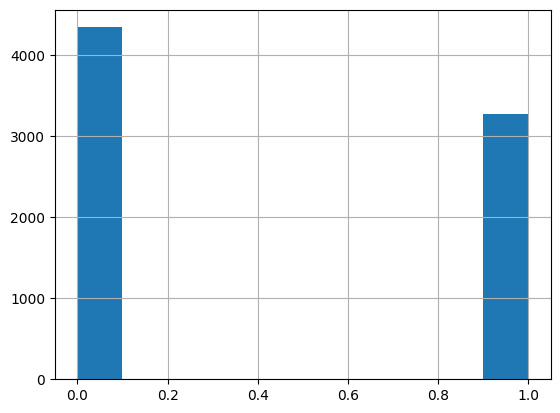

In [48]:
# histogram of targer variable
data_train['target'].hist()


In [71]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

In [68]:
data_pruebas = data_train
data_pruebas

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders ca...,1
4,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...
7608,two giant cranes holding bridge collapse nearb...,1
7609,ariaahrary thetawniest control wild fires cali...,1
7610,m utckm volcano hawaii,1
7611,police investigating ebike collided car little...,1


In [73]:
TOKENIZER = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

In [69]:
prueba = data_pruebas['text'][0]
prueba

'deeds reason earthquake may allah forgive us'

In [74]:
prueba = TOKENIZER.tokenize(prueba)
prueba

['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']

In [75]:
data_pruebas['text'] = data_pruebas['text'].apply(lambda x: TOKENIZER.tokenize(x))

C:\Users\Christian\AppData\Local\Temp\ipykernel_26964\799385001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pruebas['text'] = data_pruebas['text'].apply(lambda x: TOKENIZER.tokenize(x))


In [61]:
# frequency of words in the text
def frequency(text, label):
    freq = {}
    for x, text in zip(label, text):
        for word in text:
            key = (word, x)
            freq[key] = freq.get(key, 0) + 1
    return freq



In [76]:
dictionary = frequency(data_pruebas['text'], data_pruebas['target'])
dictionary

{('deeds', 1): 1,
 ('reason', 1): 7,
 ('earthquake', 1): 45,
 ('may', 1): 50,
 ('allah', 1): 6,
 ('forgive', 1): 1,
 ('us', 1): 84,
 ('forest', 1): 50,
 ('fire', 1): 180,
 ('near', 1): 47,
 ('la', 1): 24,
 ('ronge', 1): 1,
 ('sask', 1): 1,
 ('canada', 1): 8,
 ('residents', 1): 8,
 ('asked', 1): 1,
 ('shelter', 1): 6,
 ('place', 1): 14,
 ('notified', 1): 1,
 ('officers', 1): 4,
 ('evacuation', 1): 40,
 ('orders', 1): 9,
 ('expected', 1): 11,
 ('people', 1): 105,
 ('receive', 1): 2,
 ('wildfires', 1): 11,
 ('california', 1): 111,
 ('got', 1): 29,
 ('sent', 1): 4,
 ('photo', 1): 18,
 ('ruby', 1): 1,
 ('alaska', 1): 5,
 ('smoke', 1): 12,
 ('pours', 1): 1,
 ('school', 1): 30,
 ('rockyfire', 1): 4,
 ('update', 1): 27,
 ('hwy', 1): 10,
 ('closed', 1): 17,
 ('directions', 1): 1,
 ('due', 1): 24,
 ('lake', 1): 8,
 ('county', 1): 31,
 ('cafire', 1): 2,
 ('flood', 1): 37,
 ('disaster', 1): 117,
 ('heavy', 1): 18,
 ('rain', 1): 30,
 ('causes', 1): 9,
 ('flash', 1): 17,
 ('flooding', 1): 37,
 ('str

In [78]:
# print the biggest values in the dictionary
sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:20]


[(('like', 0), 253),
 (('im', 0), 248),
 (('amp', 0), 193),
 (('fire', 1), 180),
 (('new', 0), 170),
 (('get', 0), 163),
 (('dont', 0), 154),
 (('news', 1), 140),
 (('one', 0), 128),
 (('via', 1), 121),
 (('disaster', 1), 117),
 (('body', 0), 113),
 (('california', 1), 111),
 (('suicide', 1), 110),
 (('police', 1), 107),
 (('amp', 1), 107),
 (('people', 1), 105),
 (('via', 0), 99),
 (('would', 0), 97),
 (('video', 0), 96)]